In [ ]:
!nvidia-smi

Wed Oct 25 17:24:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

from IPython.display import display, Image
import ultralytics
from ultralytics import YOLO
ultralytics.checks()


Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CojBHzejfR8uhckjPYUE")
project = rf.workspace("oleg-milantiev-egsqq").project("road-bhozs")
dataset = project.version(5).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to Road-5 in yolov8:: 100%|██████████| 3756/3756 [00:01<00:00, 1920.88it/s]


In [ ]:
model = YOLO('yolov8m.pt')
results = model.train(data='/content/Road-5/data.yaml', epochs=20, imgsz=640)

100%|██████████| 49.7M/49.7M [00:00<00:00, 295MB/s]
Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Road-5/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

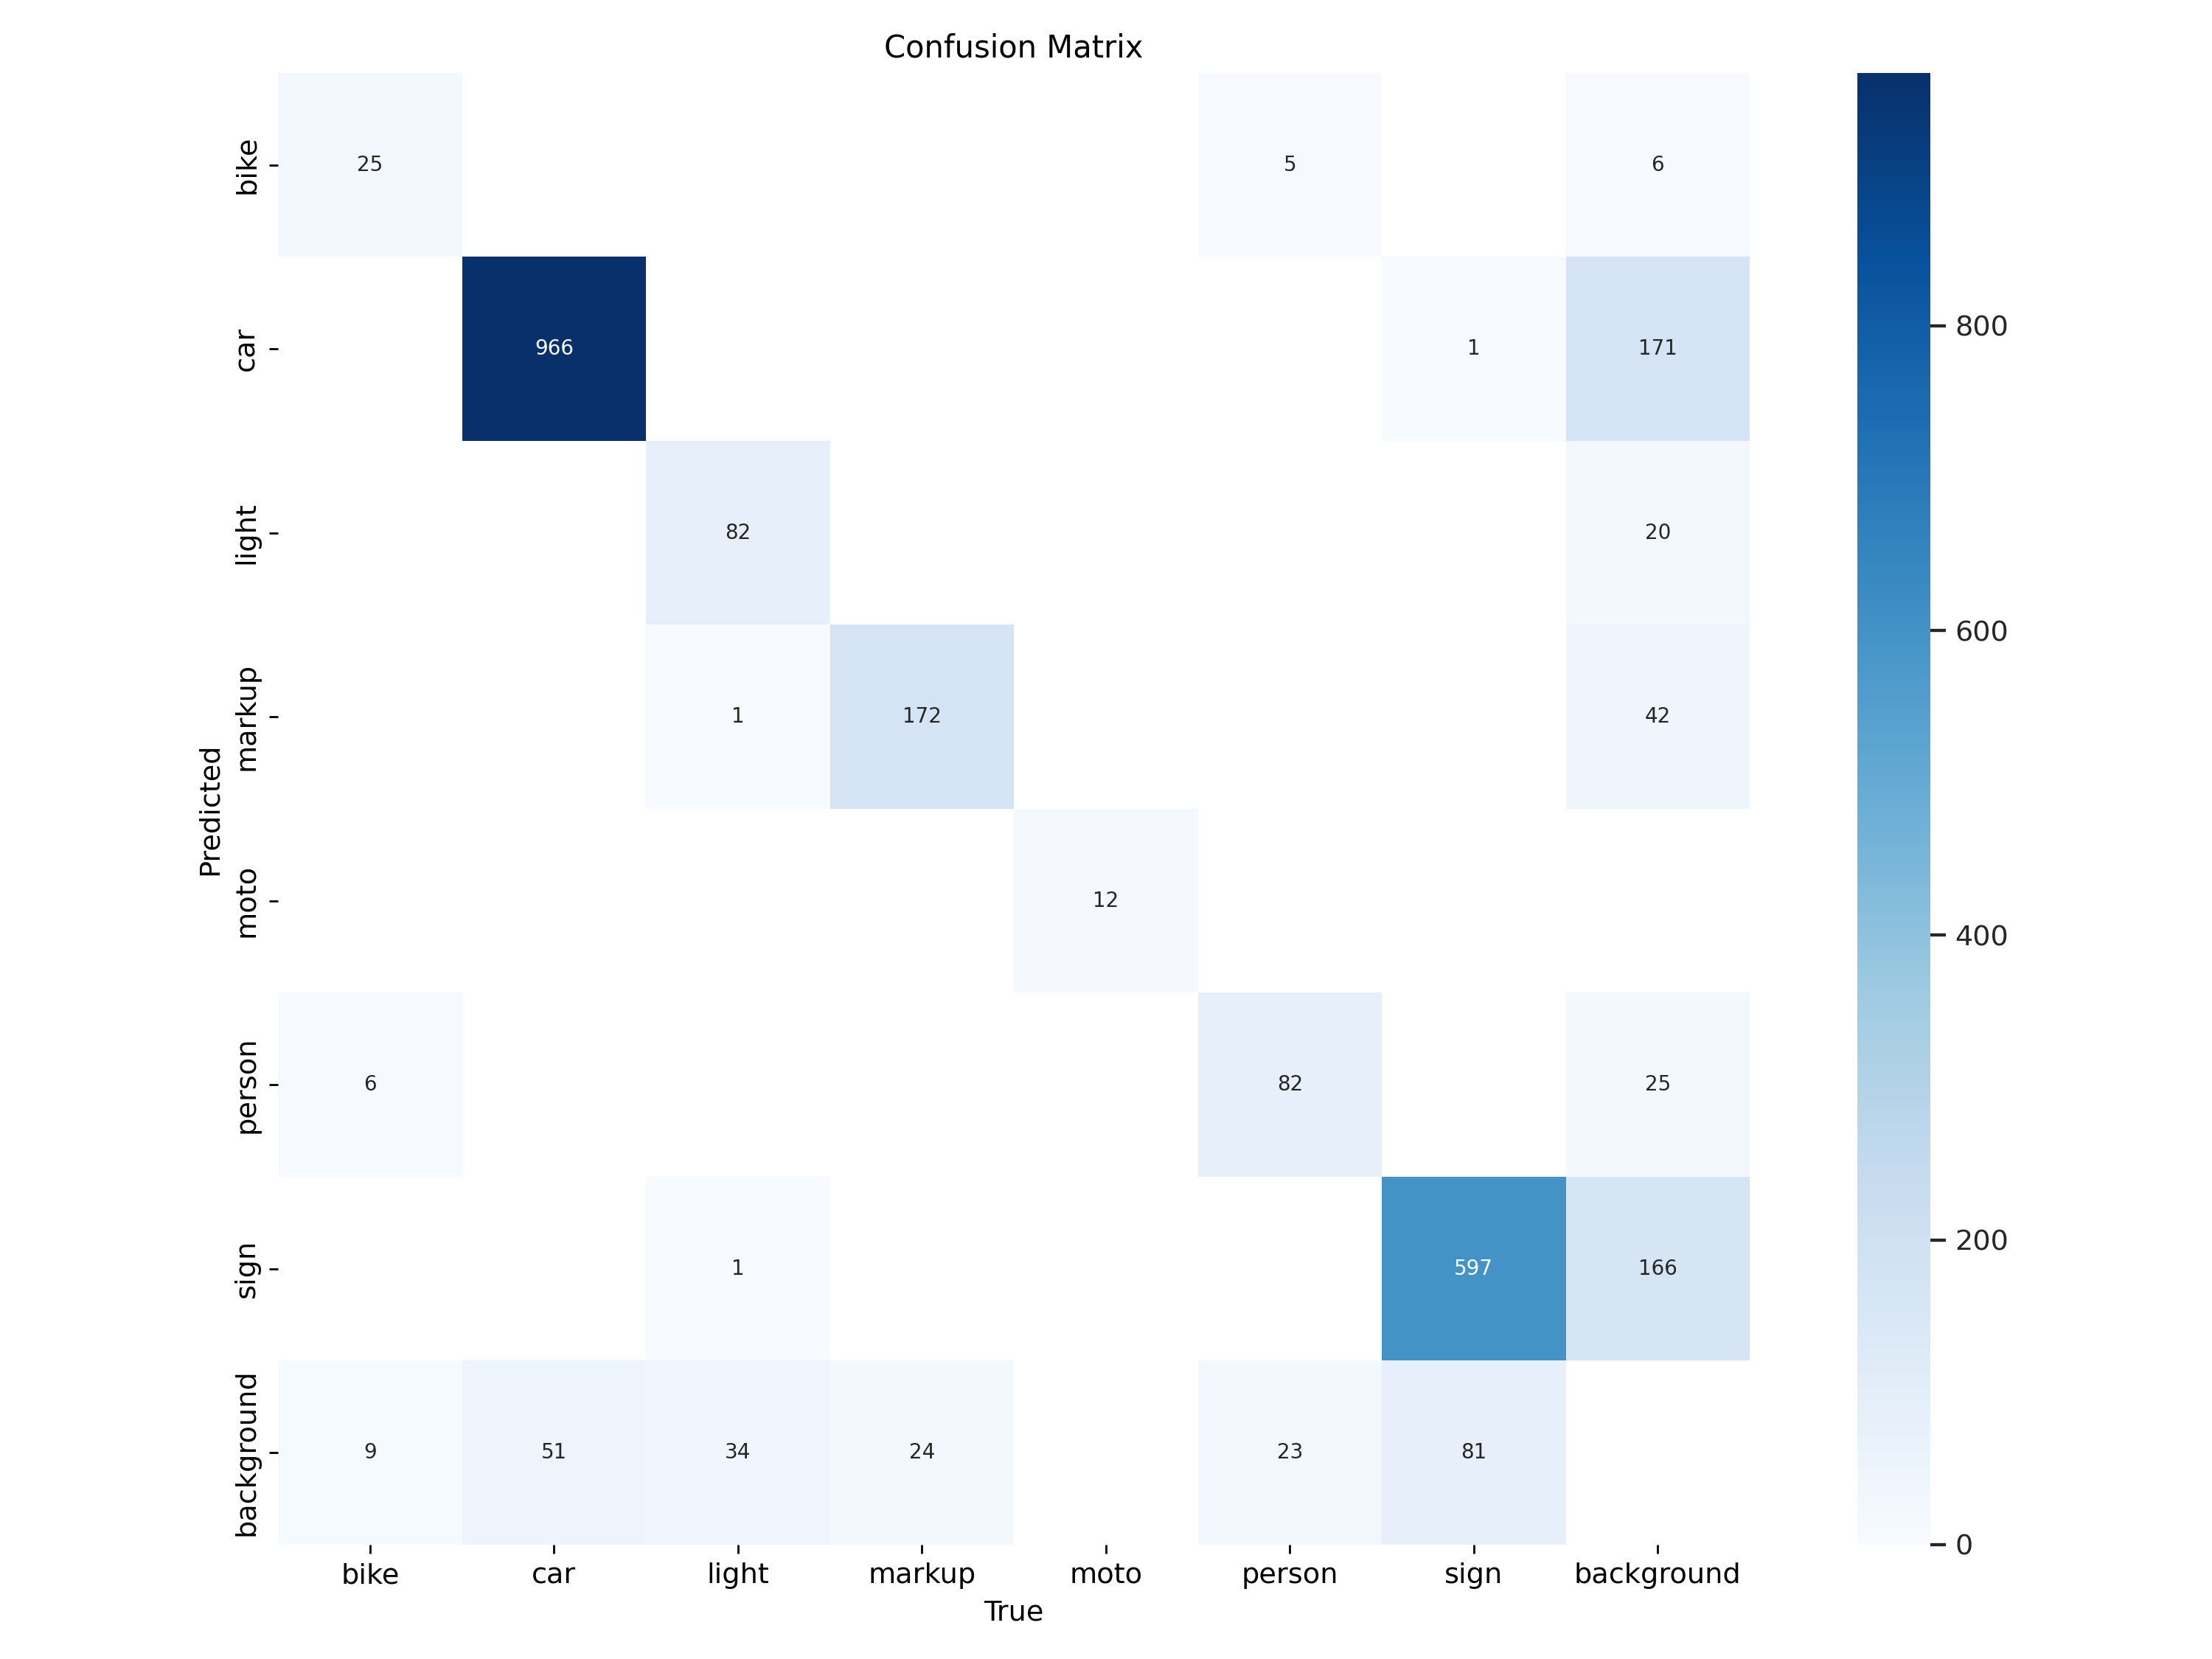

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

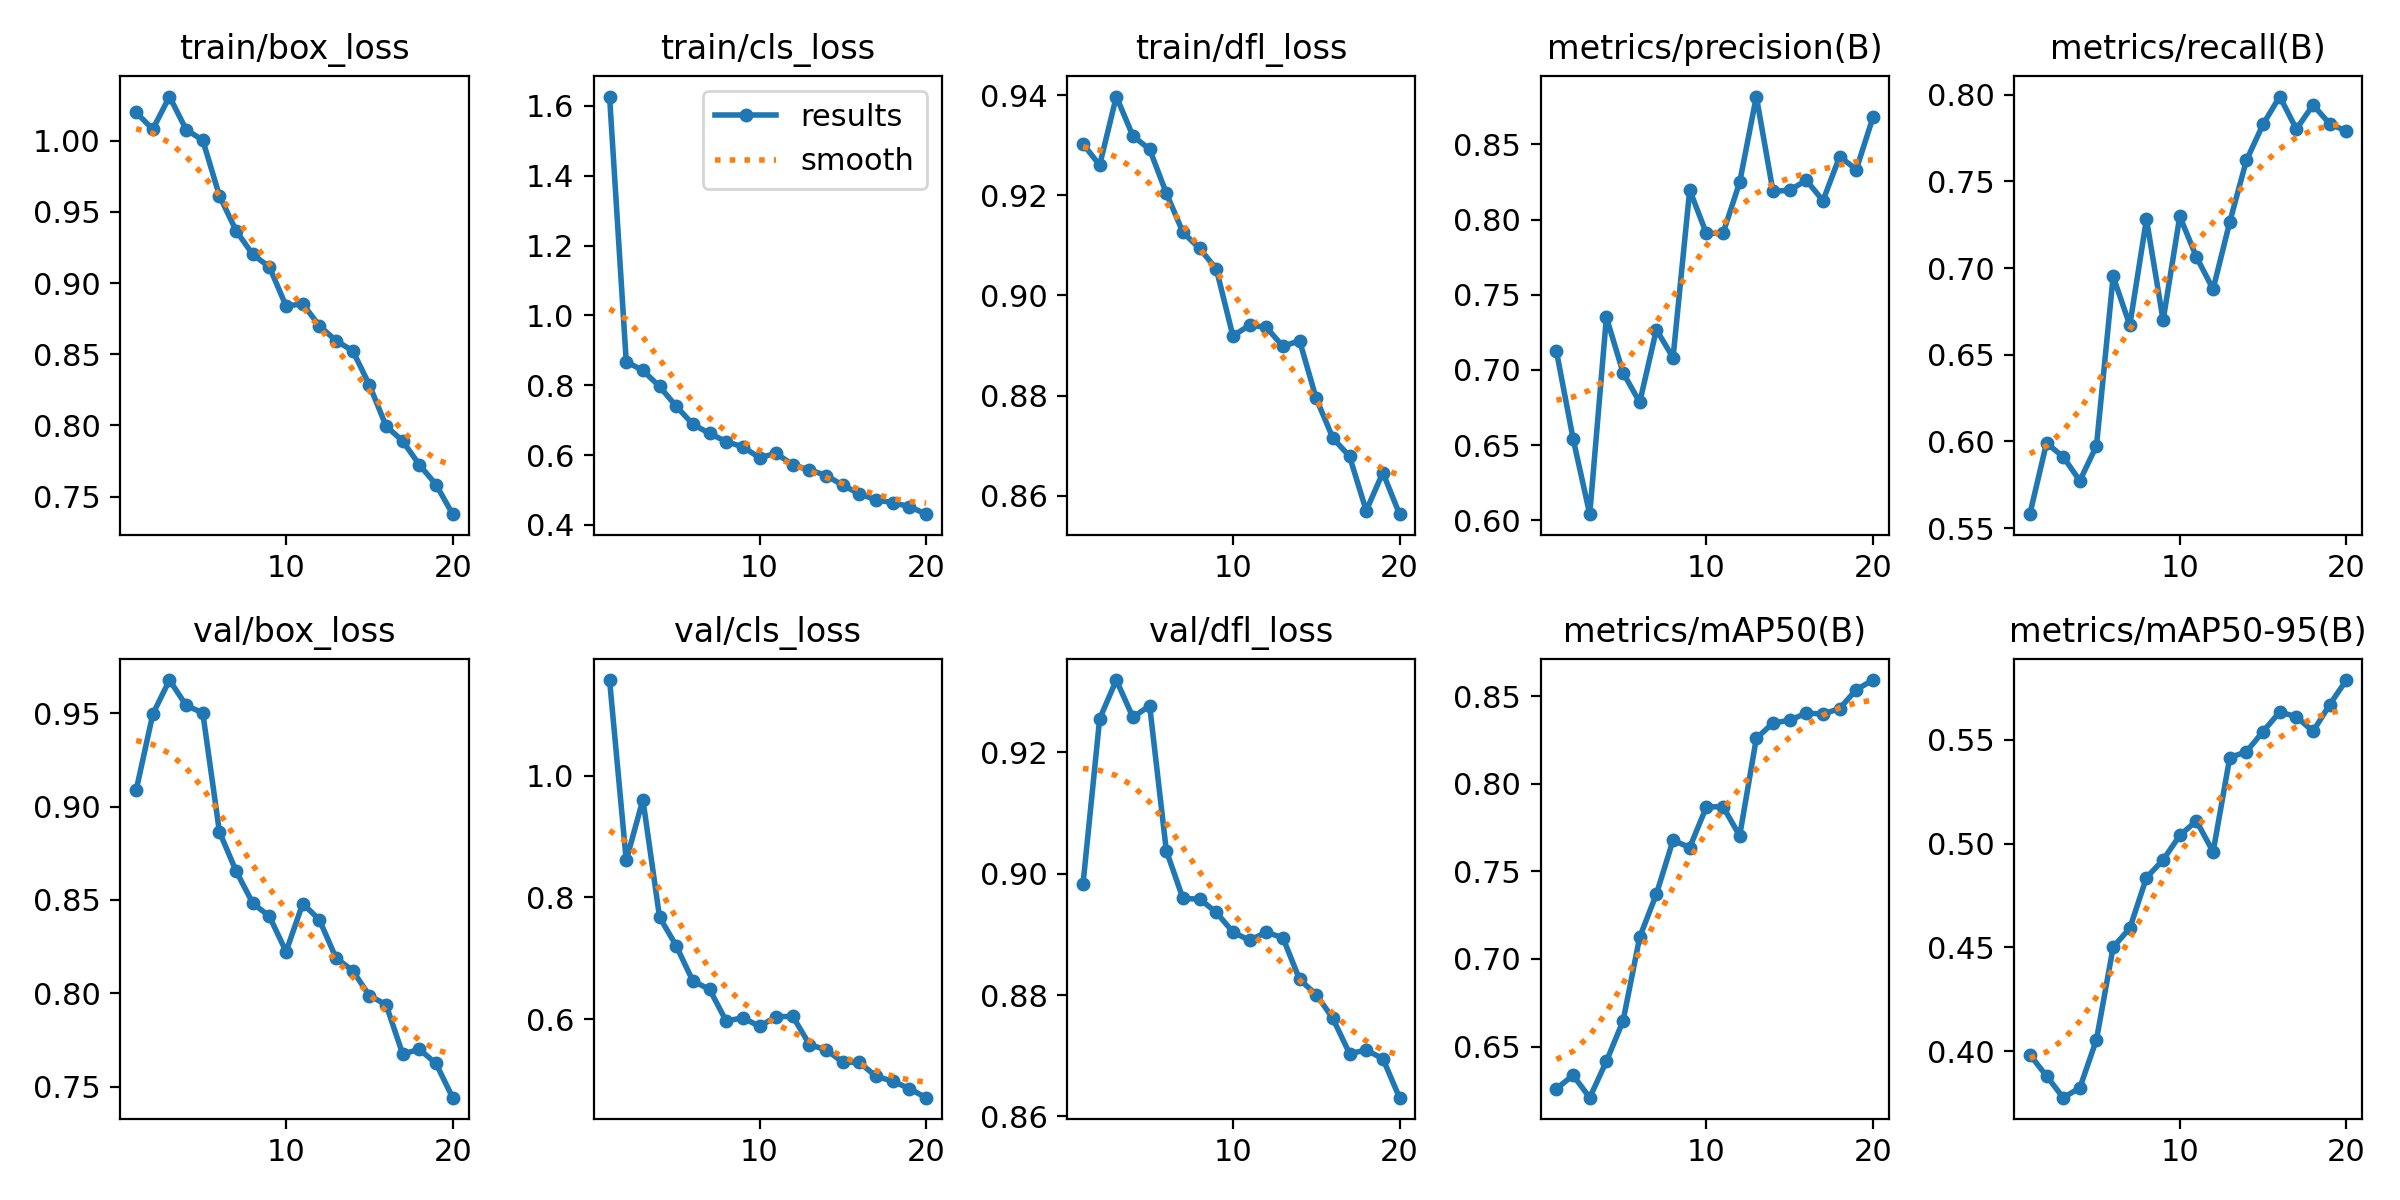

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
metrics = model.val()

Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Road-5/valid/labels.cache... 499 images, 0 backgrounds, 0 corrupt: 100%|██████████| 499/499 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:26<00:00,  1.21it/s]
                   all        499       2172      0.867      0.779      0.859      0.582
                  bike        499         40      0.748      0.593      0.736      0.503
                   car        499       1017      0.903      0.919      0.962      0.803
                 light        499        118      0.848      0.616      0.763      0.455
                markup        499        196      0.874      0.832      0.883      0.567
                  moto        499         12      0.984          1      0.995      0.637
                person     

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.4 source=/content/test.mp4 save=True

Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/1919) /content/test.mp4: 384x640 4 cars, 141.0ms
video 1/1 (2/1919) /content/test.mp4: 384x640 4 cars, 25.9ms
video 1/1 (3/1919) /content/test.mp4: 384x640 3 cars, 25.9ms
video 1/1 (4/1919) /content/test.mp4: 384x640 5 cars, 25.9ms
video 1/1 (5/1919) /content/test.mp4: 384x640 3 cars, 25.8ms
video 1/1 (6/1919) /content/test.mp4: 384x640 3 cars, 1 sign, 21.2ms
video 1/1 (7/1919) /content/test.mp4: 384x640 3 cars, 1 sign, 21.2ms
video 1/1 (8/1919) /content/test.mp4: 384x640 4 cars, 21.3ms
video 1/1 (9/1919) /content/test.mp4: 384x640 3 cars, 21.3ms
video 1/1 (10/1919) /content/test.mp4: 384x640 4 cars, 19.7ms
video 1/1 (11/1919) /content/test.mp4: 384x640 3 cars, 22.7ms
video 1/1 (12/1919) /content/test.mp4: 384x640 4 cars, 19.6ms
video 1/1 (13/1919) /content/test.mp4: 384x640 2 cars, 19.6ms
video 1/1 (14/19